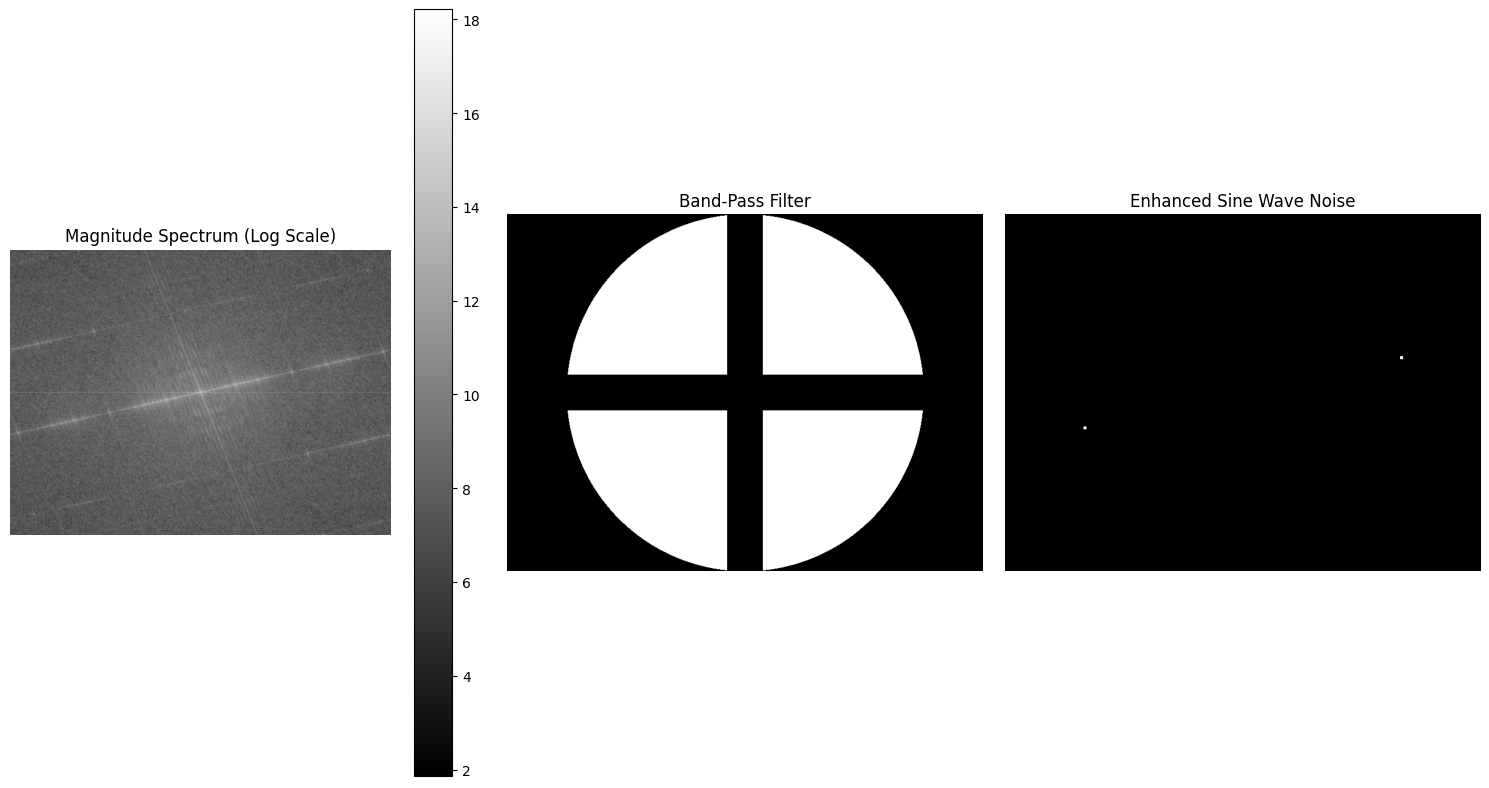

Noise sine waves detected.


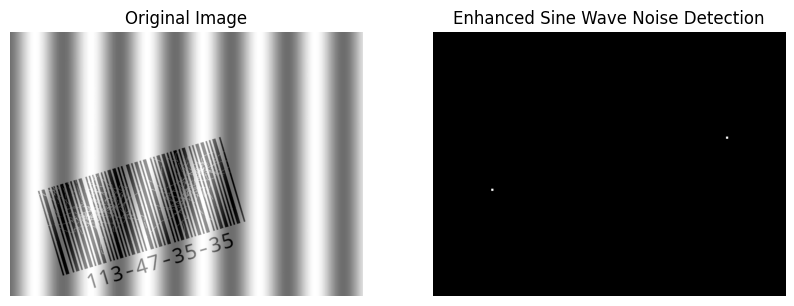

In [46]:
    #Abdallah Ahmed Hamdy 21P0333 ASU Credit ICHEP BIG NIGGA DICK, FOOTBALL PLAYER, VISCA BARCA, HIMMM
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    def detect_noise_sine_waves(image, z_score_threshold=2.5, low_freq_cutoff_ratio=0.02, high_freq_cutoff_ratio=0.5):
        """
        Detect noise sine waves in an image while avoiding structured patterns (e.g., barcodes).
        
        Parameters:
            image (numpy.ndarray): Input image (grayscale).
            z_score_threshold (float): Z-score threshold for detecting noise.
            low_freq_cutoff_ratio (float): Low frequency cutoff as a ratio of image size.
            high_freq_cutoff_ratio (float): High frequency cutoff as a ratio of image size.
            
        Returns:
            numpy.ndarray: Binary mask highlighting detected sine wave noise.
        """
        # Convert the image to grayscale if it is not
        if len(image.shape) == 3:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image
        
        # Step 1: Apply FFT to transform the image to the frequency domain
        dft = np.fft.fft2(gray_image)
        dft_shift = np.fft.fftshift(dft)
        magnitude_spectrum = np.abs(dft_shift)
        
        # Step 2: Compute z-scores of the magnitude spectrum
        mean_mag = np.mean(magnitude_spectrum)
        std_mag = np.std(magnitude_spectrum)
        z_scores = (magnitude_spectrum - mean_mag) / std_mag
        
        # Step 3: Create a frequency filter
        rows, cols = gray_image.shape
        center_row, center_col = rows // 2, cols // 2
        low_freq_cutoff = int(min(rows, cols) * low_freq_cutoff_ratio)
        high_freq_cutoff = int(min(rows, cols) * high_freq_cutoff_ratio)
        
        # Create a circular band-pass filter
        y, x = np.ogrid[:rows, :cols]
        distance_from_center = np.sqrt((x - center_col)**2 + (y - center_row)**2)
        band_pass_filter = (distance_from_center >= low_freq_cutoff) & (distance_from_center <= high_freq_cutoff)
        
        # Exclude central frequencies (structured patterns like barcodes)
        exclusion_width = int(min(rows, cols) * 0.05)  # Exclude a small width around central axes
        band_pass_filter[center_row - exclusion_width:center_row + exclusion_width, :] = False
        band_pass_filter[:, center_col - exclusion_width:center_col + exclusion_width] = False
        
        # Apply the band-pass filter to the z-score mask
        sine_wave_mask = (z_scores > z_score_threshold) & band_pass_filter
        
        # Step 4: Enhance the detected regions using dilation
        kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size to control dilation
        enhanced_mask = cv2.dilate(sine_wave_mask.astype(np.uint8), kernel, iterations=1)
        
        # Step 5: Create an output image highlighting the sine wave noise
        sine_wave_image = np.zeros_like(gray_image)
        sine_wave_image[enhanced_mask > 0] = 255  # Highlight detected noise patterns
        
        # DEBUG: Display the magnitude spectrum, filter, and detection
        plt.figure(figsize=(15, 8))
        
        plt.subplot(1, 3, 1)
        plt.title("Magnitude Spectrum (Log Scale)")
        plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
        plt.colorbar()
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title("Band-Pass Filter")
        plt.imshow(band_pass_filter, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title("Enhanced Sine Wave Noise")
        plt.imshow(sine_wave_image, cmap='gray')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Check if any sine waves were detected
        if np.any(enhanced_mask):
            print("Noise sine waves detected.")
        else:
            print("No noise sine waves detected.")
        
        return sine_wave_image

    # Example usage:
    # Load an image (grayscale or color)
    image_path = 'C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//11 - bayza 5ales di bsara7a.jpg'
    #image_path = 'C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//07 - mal7 w felfel.jpg'
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Detect noise sine waves
    sine_wave_image = detect_noise_sine_waves(input_image, z_score_threshold=2.5, low_freq_cutoff_ratio=0.02, high_freq_cutoff_ratio=0.5)

    # Save the result
    cv2.imwrite('sine_wave_image.jpg', sine_wave_image)

    # Display the result using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Sine Wave Noise Detection')
    plt.imshow(sine_wave_image, cmap='gray')
    plt.axis('off')

    plt.show()
